###YOUTUBE NETWORK ANALYSIS

###Project by Team 10

### Section : B


###PES2UG19CS082 :  Basanagouda S Hadimani

###PES2UG19CS083 : Batch Sai Suraj

###PES2UG19CS096 : Chandrahas L G

###PES2UG19CS099 : Chintamani Bhat

###DataSet Link: https://snap.stanford.edu/data/com-Youtube.html




##1) Load the dataset into NetworkX to create an undirected graph



In [ ]:
import networkx as nx
from networkx.algorithms import community
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random
plt.rcParams.update({'figure.max_open_warning': 50})

##Generates a plot with the degrees of distribution of the connected components. To facilitate the representation it was decided to also use the loglog contained in numpy.Plot of the histogram degree distribution
    --------------------------------------------------
    Input: G---> Graphs
               A networkx graph
    Output: a list of values of the degree distribution

In [ ]:
def plot_degree_dist(G):
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    
    plt.figure()
    plt.plot(values, P_k, "ro-")
    plt.xlabel("k")
    plt.ylabel("p(k)")
    plt.title("Degree Distribution")
    plt.show()
    
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo-")
    plt.xlabel("log k")
    plt.ylabel("log p(k)")
    plt.title("log Degree Distribution")
    plt.show()
    plt.figure()
    degrees = [G.degree(n) for n in G.nodes()]
    counts = dict()
    for i in degrees:
        counts[i] = counts.get(i, 0) + 1
    axes = plt.gca()
    axes.set_xlim([0,100])
    axes.set_ylim([0,1000])
    plt.grid(False)
    plt.bar(list(counts.keys()), counts.values(), color='r')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

Generates a plot with the  IN/OUT degrees of distribution of the connected components. To facilitate the representation it was decided to also use the loglog contained in numpy
        --------------------------------------------------
     Parameters
    Input: G---> Graphs
           A networkx graph
    Output: a list of values of the degree distribution

In [ ]:
def plot_degree_In(G):
    N = G.order()
    in_degrees = G.in_degree()  #built-in function to estimate in-degree distribution
    in_degrees = dict(in_degrees)
    in_values= sorted(set(in_degrees.values()))
    in_hist = [list(in_degrees.values()).count(x) for x in in_values]
    in_P_k = [x / N for x in in_hist]
    out_degrees = G.out_degree()   #built-in function to estimate out-degree distribution
    out_degrees = dict(out_degrees)
    out_values = sorted(set(out_degrees.values()))
    out_hist = [list(out_degrees.values()).count(x) for x in out_values]
    out_P_k = [x / N for x in out_hist]
    
    plt.figure()
    plt.grid(False)
    plt.plot(in_values ,in_P_k, "r.")
    plt.plot(out_values,out_P_k, "b.")
    plt.legend(['In-degree','Out-degree'])
    plt.xlabel("k")
    plt.ylabel("p(k)")
    plt.title("Degree Distribution")
    plt.show()
    
    plt.figure()
    plt.grid(False)
    plt.loglog(in_values ,in_P_k, "r.")
    plt.loglog(out_values,out_P_k, "b.")
    plt.legend(['In-degree','Out-degree'])
    plt.xlabel("log k")
    plt.ylabel("log p(k)")
    plt.title("log log Degree Distribution")
    plt.show()


Generates a plot with the  clustering coefficientof.It is a measure of the degree to which nodes in a graph tend to cluster together.To facilitate the representation it was decided to also use the loglog contained in numpy
        --------------------------------------------------
     Parameters
    Input: G---> Graphs
    Output: a list of values of the degree distribution

In [ ]:
def plot_clustering_coefficient(G):
        clust_coefficients = nx.clustering(G)  #built-in function to estimate clustering coeff  
        clust_coefficients = dict(clust_coefficients)
        values1= sorted(set(clust_coefficients.values()))
        histo1 = [list(clust_coefficients.values()).count(x) for x in values1]
        
        plt.figure()
        plt.grid(False)
        plt.plot(values1,histo1, "r.")
        plt.xlabel("k")
        plt.ylabel("C (Clustering Coeff)")
        plt.title("Clustering Coefficients")
        plt.show()
        plt.figure()
        plt.grid(False)
        plt.loglog(values1,histo1, "r.")
        plt.xlabel("log degree k")
        plt.ylabel("c (clustering coeff)")
        plt.title("log log Clustering Coefficients")
        plt.show()
        
        plt.figure()
        degrees1 = [nx.clustering(G,n) for n in G.nodes()]
        plt.hist(degrees1)
        plt.xlabel("log degree k")
        plt.ylabel("C (Clustering Coeff) hist")
        plt.title("Clustering Coefficients")
        plt.show()

##Generate a view of lattice graph
            
            Parameters:
            •G (NetworkX graph) – 
            k (node) – number of adjacent nodes
        Returns:
            graphs – a graph lattice view
        Return type: networkx graph

In [ ]:
def adjacent_edges(nodes, halfk):    

    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u,v


       
def make_ring_lattice(n,k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

def flip(p):
    return np.random.random() < p 

def rewire(G,p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p): 
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)
            
def small_world(n,k,p):
    sw = make_ring_lattice(n,k)
    rewire(sw,p)
    return sw

##Return the core number for each vertex.A k-core is a maximal subgraph that contains nodes of degree k or more.The core number of a node is the largest value k of a k-core containing that node.

    Parameters
    ----------
    G : NetworkX graph
       A graph or directed graph
    Returns
    -------
    core_number : dictionary
       A dictionary keyed by node to the core number

In [ ]:
def k_core(G,k,t):
        H=G.copy() 
        i=1
        while (i>0):
            i=0
            for node in list(H.nodes()):
                if H.degree(node)<k:
                    H.remove_node(node)
                    i+=1
        if (H.order()!=0):
            plt.figure()
            plt.title(str(k) +'-core decomposition of' + t) 
            nx.draw(H,with_labels=True)
        return H

def full_k_core_decomposition(G,t):
    empty = False
    k=1
    while (empty==False):
        H = k_core(G,k,t)
        k+=1
        if (H.order()==0):
            empty = True

['1 2', '1 3', '1 4', '1 5', '1 6', '1 7', '1 8', '1 9', '1 10', '1 11', '1 12', '1 13', '1 14', '1 15', '1 16', '1 17', '1 18', '1 19', '1 20', '1 21', '1 22', '1 376', '1 1219', '1 268635', '1 317880', '1 665255', '1 665256', '1 665257', '1 665258', '2 4', '2 40', '2 106', '2 107', '2 126', '2 134', '2 242', '2 247', '2 276', '2 291', '2 341', '2 363', '2 365', '2 367', '2 404', '2 446', '2 455', '2 480', '2 495', '2 514', '2 534', '2 688', '2 718', '2 723', '2 730', '2 762', '2 776', '2 797', '2 803', '2 839', '2 840', '2 847', '2 848', '2 851', '2 881', '2 882', '2 903', '2 940', '2 967', '2 1009', '2 1013', '2 1070', '2 1085', '2 1180', '2 1183', '2 1225', '2 1227', '2 1244', '2 1258', '2 1270', '2 1708', '2 1795', '2 1870', '2 1999', '2 2059', '2 2235', '2 2243', '2 2246', '2 2254', '2 2266', '2 2661', '2 2723', '2 2775', '2 2844', '2 2892', '2 2974', '2 3100', '2 3102', '2 3120', '2 3173', '2 3193', '2 3355', '2 3356', '2 3357', '2 3358', '2 3359', '2 3360', '2 3361', '2 3362', 

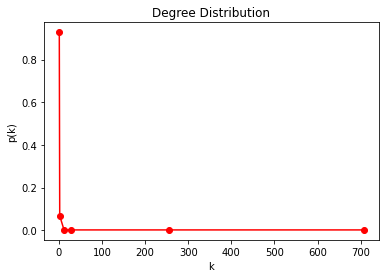

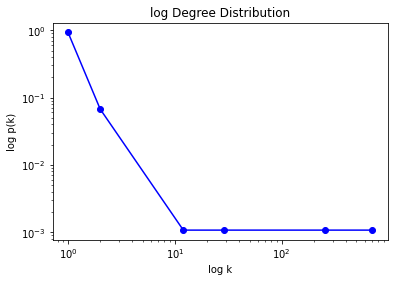

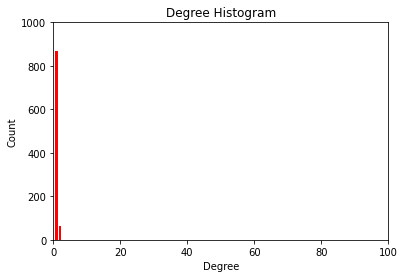

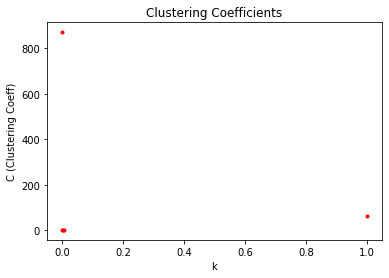

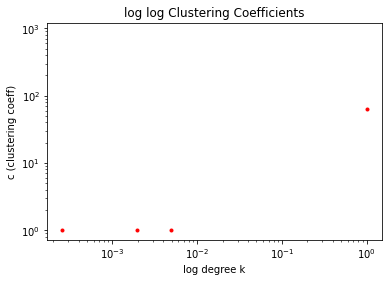

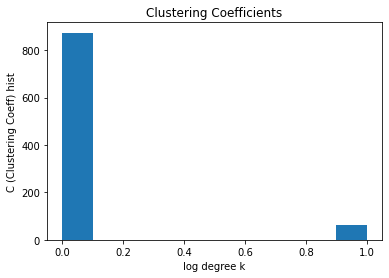

The average clustering coefficient is: 0.06724345004854251


In [ ]:
graphs = nx.read_edgelist('com-youtube.ungraph.txt',create_using=nx.Graph(), nodetype=int) 

subset = 1000
edges = graphs.edges()
edges = list(edges)[:int(subset)]   
edges = [list(elem) for elem in edges] 


#%% formatting necessary to allow performing nx.parse_edglist

_newlist = []
_list = []

for subsets in edges:
    for element in subsets:
        _list.append(element)

_temp= int(len(_list)*0.5)

for i in range (_temp):
    _newlist.append(str(_list[2*i]) + " " + str(_list[2*i +1]) ) 
print(_newlist)
graphs = nx.parse_edgelist(_newlist, nodetype = int)
#%%
"""1 Original Graphs Measures"""
N=graphs.order()  
E = graphs.number_of_edges()  
Av_deg_undirected = float(2*E)/N  

print ("\n ORIGINAL GRAPH: ")
print("The number of nodes is:", N)
print("The number of edges is:", E)
print("The average degree (undirected graph) is:", Av_deg_undirected)

plot_degree_dist(graphs) 
plot_clustering_coefficient(graphs)
print ('The average clustering coefficient is: ' + str(nx.average_clustering(graphs)))

##Community Generation

In [ ]:
communities_gen = community.girvan_newman(graphs)
top_level_communities = next(communities_gen)
next_level_communities = next(communities_gen)
a=sorted(map(sorted,next_level_communities))

##GENERATION OF THE SBM GRAPH

([0.05128205128205128, 0.00010055304172951231, 7.975435658172828e-05], [0.00010055304172951231, 0.00784313725490196, 0.00038422834141432625], [7.975435658172828e-05, 0.00038422834141432625, 0.003110419906687403])

 SBM GRAPH: 
The number of nodes is: 937
The number of edges is: 986
The average degree (undirected graph) is: 2.104589114194237


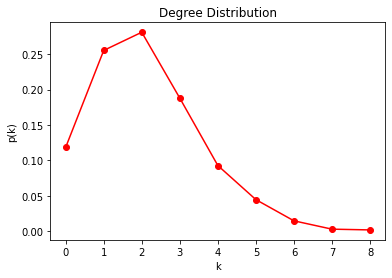

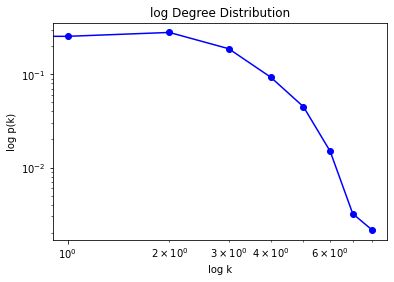

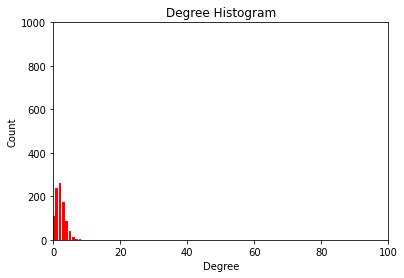

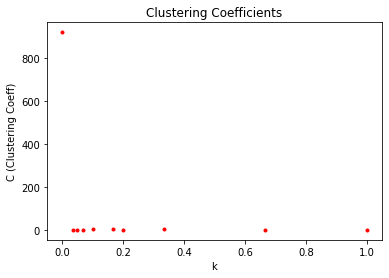

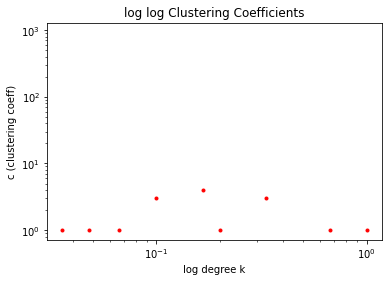

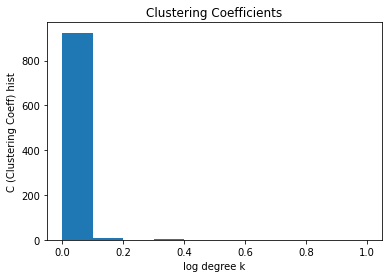

The average clustering coefficient is: 0.004251156172180718


In [ ]:

sizes = []
probs = []
for com in a:
  sizes.append(len(com))
  
num11 = sizes[0] * (sizes[0]-1)*0.5
num12 = sizes[0] * sizes[1]
num13 = sizes[0] * sizes[2]
num22 = sizes[1] * (sizes[1]-1)*0.5
num23 = sizes[1] * sizes[2]
num33 = sizes[2] * (sizes[2]-1)*0.5

num_edges11,num_edges22,num_edges33,num_edges12,num_edges13,num_edges23 = [0,0,0,0,0,0]
for g in edges:
    g[0] = int(g[0])
    g[1] = int(g[1]) 
for h in edges:
  if (h[0] in a[0] and h[1] in a[0]):
    num_edges11+=1
  elif (h[0] in a[1] and h[1] in a[1]):
    num_edges22+=1
  elif (h[0] in a[2] and h[1] in a[2]):
    num_edges33+=1    
  elif ((h[0] in a[0] and h[1] in a[1]) or (h[0] in a[1] and h[1] in a[0])):
    num_edges12+=1    
  elif ((h[0] in a[0] and h[1] in a[2]) or (h[0] in a[2] and h[1] in a[0])):
    num_edges13+=1
  else:
      (h[0] in a[1] and h[1] in a[2]) or (h[0] in a[2] and h[1] in a[1])
      num_edges23+=1    
p11 = float (num_edges11/num11)
p12 = float (num_edges12/num12)
p13 = float (num_edges13/num13)
p22 = float (num_edges22/num22)
p23 = float (num_edges23/num23)
p33 = float (num_edges33/num33)

probs1 = [p11,p12,p13],[p12,p22,p23],[p13,p23,p33]

print(probs1)
#%% It is now possible to generate the SBM and calculate some statistic measures on it

SBM = nx.stochastic_block_model(sizes, probs1, seed=0)

"""2a STATISTICS ABOUT MEASURES - SBM"""
SBM_nodes=SBM.order()
SBM_Edges = SBM.number_of_edges()
Av_deg_SBM = float(2*SBM_Edges)/SBM_nodes

print ("\n SBM GRAPH: ")
print("The number of nodes is:", SBM_nodes)
print("The number of edges is:", SBM_Edges)
print("The average degree (undirected graph) is:", Av_deg_SBM)

plot_degree_dist(SBM) 
plot_clustering_coefficient(SBM)
print ('The average clustering coefficient is: ' + str(nx.average_clustering(SBM)))

##Generation of Erdos-Renyi random graph


 ERDOS-RENYI GRAPH: 
The number of nodes is: 937
The number of edges is: 1039
The average degree (undirected graph) is: 2.2177161152614726


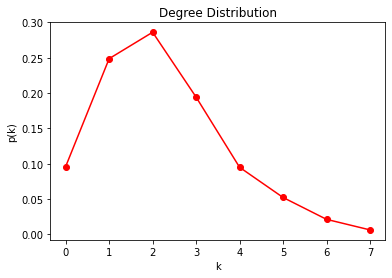

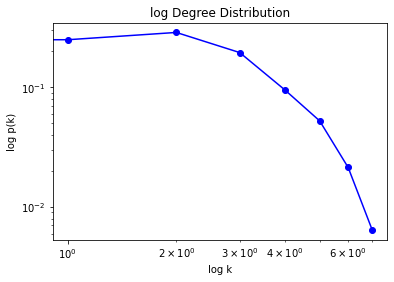

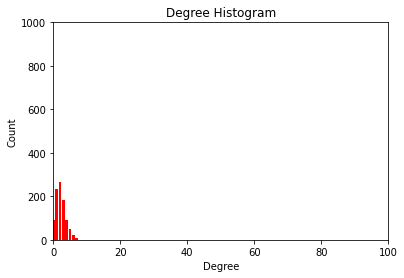

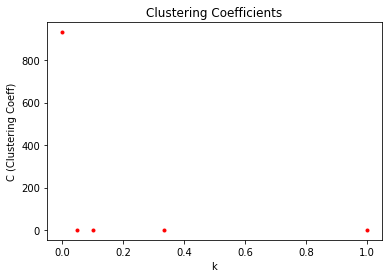

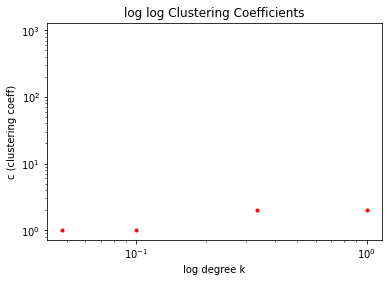

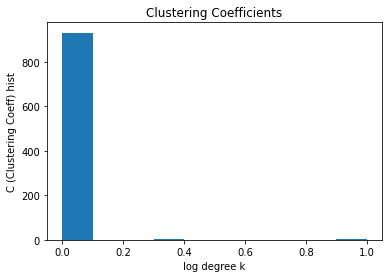

The average clustering coefficient is: 0.003003506632108553


In [ ]:
"""2b STATISTICS ABOUT MEASURES - ERDOS-RENYI"""

Proba = E/(N*(N-1)/2)
Erdos_renyi = nx.erdos_renyi_graph (N, Proba)
Nodes_erdos=Erdos_renyi.order()
Edges_erdos = Erdos_renyi.number_of_edges()
Av_deg_und_erdos = float(2*Edges_erdos)/Nodes_erdos  

print ("\n ERDOS-RENYI GRAPH: ")
print("The number of nodes is:", Nodes_erdos)
print("The number of edges is:", Edges_erdos)
print("The average degree (undirected graph) is:", Av_deg_und_erdos)

plot_degree_dist(Erdos_renyi) 
plot_clustering_coefficient(Erdos_renyi)
print ('The average clustering coefficient is: ' + str(nx.average_clustering(Erdos_renyi)))



 SMALL WORLD GRAPH: 
The number of nodes is: 937
The number of edges is: 1874
The average degree (undirected graph) is: 4.0


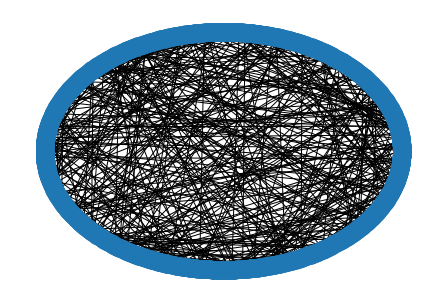

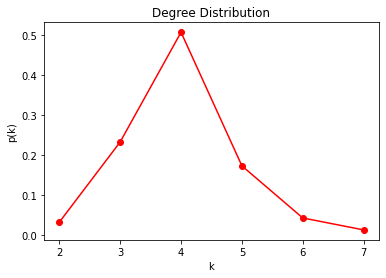

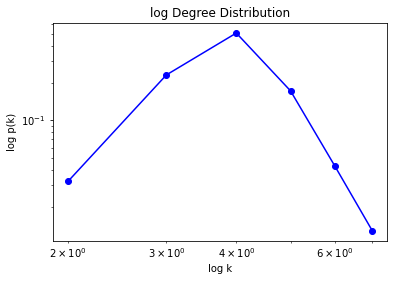

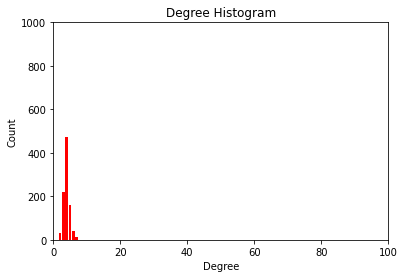

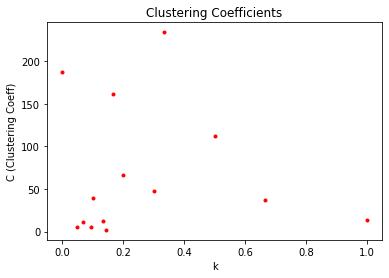

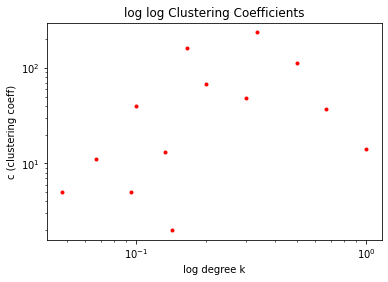

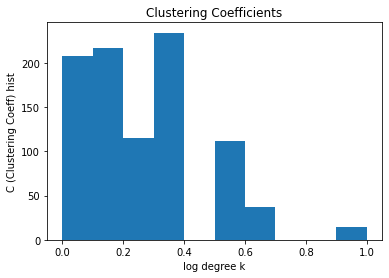

The average clustering coefficient is: 0.25072927783706855


In [ ]:
"""2b STATISTICS ABOUT MEASURES - SMALL WORLD"""

Small_World = small_world(N,4,0.2)
nx.draw_circular(Small_World)

Nodes_SW=Small_World.order()
Edge_SW = Small_World.number_of_edges()
Av_deg_SW = float(2*Edge_SW)/Nodes_SW  
print ("\n SMALL WORLD GRAPH: ")
print("The number of nodes is:", Nodes_SW)
print("The number of edges is:", Edge_SW)
print("The average degree (undirected graph) is:", Av_deg_SW)

plot_degree_dist(Small_World) 
plot_clustering_coefficient(Small_World)
print ('The average clustering coefficient is: ' + str(nx.average_clustering(Small_World)))


 DIRECTED VERSION WITHOUT 25% OF THE LINKS: 
The number of nodes is: 937
The number of edges is: 1750
The average degree (directed graph) is: 1.0672358591248665


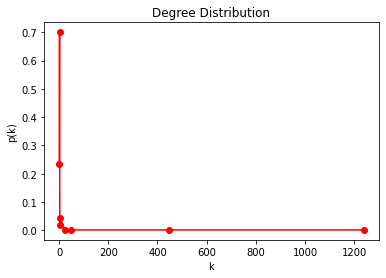

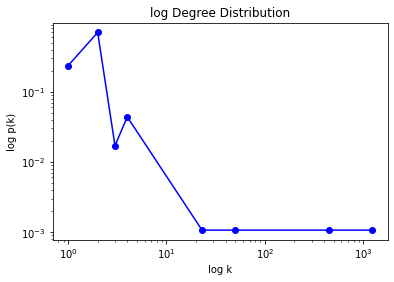

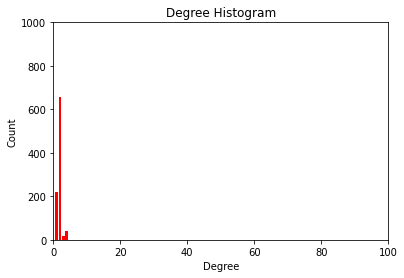

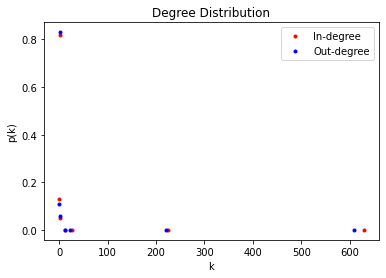

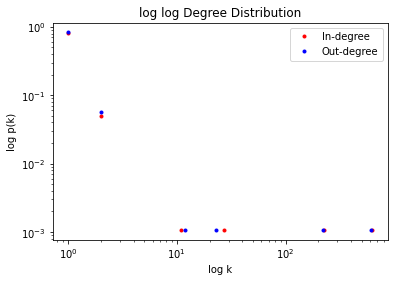

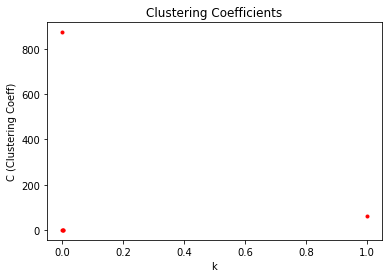

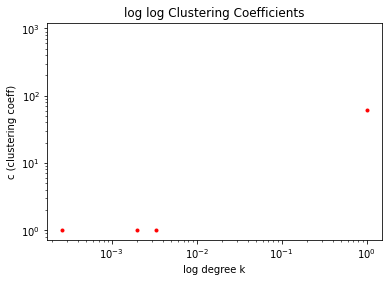

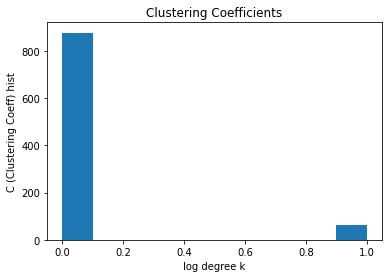

The average clustering coefficient is: 0.06510646528385383


In [ ]:
"""4 DIRECTED VERSION WITHOUT 25% OF THE LINKS"""

k = int(E*0.25)
DG = graphs.copy()
DG = DG.to_directed()
edges_d = DG.edges()
list_edges_d = list(edges_d)
random.shuffle(list_edges_d)

for edgee in list_edges_d:
    if (DG.degree(edgee[0]) != 1 and DG.degree(edgee[1]) != 1):
        DG.remove_edge(edgee[0],edgee[1])
        k-=1
    if (k==0):
        break

N4=DG.order()
E4 = DG.number_of_edges()
Av_deg_d = float(E)/N 

print ("\n DIRECTED VERSION WITHOUT 25% OF THE LINKS: ")
print("The number of nodes is:", N4)
print("The number of edges is:", E4)
print("The average degree (directed graph) is:", Av_deg_d)

plot_degree_dist(DG)
plot_degree_In(DG)
plot_clustering_coefficient(DG)
DG = DG.to_undirected()
print ('The average clustering coefficient is: ' + str(nx.average_clustering(DG)))

##Page Rank Calculations

In [ ]:
nodes = dict()
val = 0
for node in list(graphs.nodes()):
    nodes[node] = val
    val += 1

In [ ]:
# We have calculated page rank using three measures - simple pagerank, personalized pagerank, nstart pagerank, weighted pagerank, weighted personalized pagerank
simple_pagerank = nx.pagerank(graphs, alpha=0.85)
personalized_pagerank = nx.pagerank(graphs, alpha=0.85, personalization=nodes)
nstart_pagerank = nx.pagerank(graphs, alpha=0.85, nstart=nodes)
weighted_pagerank = nx.pagerank(graphs, alpha=0.85)
weighted_personalized_pagerank = nx.pagerank(graphs, alpha=0.85, personalization=nodes)

df_metrics = pd.DataFrame(dict(
    simple_pagerank = simple_pagerank,
    personalized_pagerank = personalized_pagerank,
    nstart_pagerank = nstart_pagerank,
    weighted_pagerank = weighted_pagerank,
    weighted_personalized_pagerank = weighted_personalized_pagerank,
))
df_metrics.index.name='Nodes'
df_metrics

,simple_pagerank,personalized_pagerank,nstart_pagerank,weighted_pagerank,weighted_personalized_pagerank
Nodes,,,,,
1,0.013706,0.003337,0.013704,0.013706,0.003337
2,0.112634,0.063337,0.112636,0.112634,0.063337
3,0.006097,0.003030,0.006096,0.006097,0.003030
4,0.329266,0.390945,0.329277,0.329266,0.390945
5,0.000562,0.000099,0.000562,0.000562,0.000099
...,...,...,...,...,...
18008,0.000556,0.000788,0.000556,0.000556,0.000788
18009,0.000556,0.000789,0.000556,0.000556,0.000789
18010,0.000556,0.000789,0.000556,0.000556,0.000789


In [ ]:
page_rank = nx.pagerank(graphs)
page_rank

{1: 0.013705952628139798,
 2: 0.1126335803273842,
 3: 0.006096834170509334,
 4: 0.3292657452951005,
 5: 0.0005619688601983223,
 6: 0.0005619688601983223,
 7: 0.0005619688601983223,
 8: 0.0005619688601983223,
 9: 0.0005619688601983223,
 10: 0.0005619688601983223,
 11: 0.0009574806925872697,
 12: 0.0005619688601983223,
 13: 0.0005619688601983223,
 14: 0.0005619688601983223,
 15: 0.0005619688601983223,
 16: 0.0005619688601983223,
 17: 0.0005619688601983223,
 18: 0.0005619688601983223,
 19: 0.0005619688601983223,
 20: 0.0005619688601983223,
 21: 0.0005619688601983223,
 22: 0.0005619688601983223,
 40: 0.0005337243192118247,
 45: 0.0005555972112576775,
 47: 0.0005555972112576775,
 63: 0.0005555972112576775,
 68: 0.0005555972112576775,
 77: 0.0005555972112576775,
 78: 0.0005555972112576775,
 91: 0.0005555972112576775,
 100: 0.0005555972112576775,
 104: 0.0005555972112576775,
 106: 0.0009292361516007721,
 107: 0.0005337243192118247,
 114: 0.0005555972112576775,
 115: 0.0005555972112576775,
 11

##Degree Centrality

In [ ]:
dict_degree_centrality = nx.degree_centrality(graphs)
dict_degree_centrality

{1: 0.030982905982905987,
 2: 0.27350427350427353,
 3: 0.012820512820512822,
 4: 0.7553418803418804,
 5: 0.0010683760683760685,
 6: 0.0010683760683760685,
 7: 0.0010683760683760685,
 8: 0.0010683760683760685,
 9: 0.0010683760683760685,
 10: 0.0010683760683760685,
 11: 0.002136752136752137,
 12: 0.0010683760683760685,
 13: 0.0010683760683760685,
 14: 0.0010683760683760685,
 15: 0.0010683760683760685,
 16: 0.0010683760683760685,
 17: 0.0010683760683760685,
 18: 0.0010683760683760685,
 19: 0.0010683760683760685,
 20: 0.0010683760683760685,
 21: 0.0010683760683760685,
 22: 0.0010683760683760685,
 40: 0.0010683760683760685,
 45: 0.0010683760683760685,
 47: 0.0010683760683760685,
 63: 0.0010683760683760685,
 68: 0.0010683760683760685,
 77: 0.0010683760683760685,
 78: 0.0010683760683760685,
 91: 0.0010683760683760685,
 100: 0.0010683760683760685,
 104: 0.0010683760683760685,
 106: 0.002136752136752137,
 107: 0.0010683760683760685,
 114: 0.0010683760683760685,
 115: 0.0010683760683760685,
 117

##Closeness Centrality

In [ ]:
dict_closeness_centrality = nx.closeness_centrality(graphs)
dict_closeness_centrality

{1: 0.5078676071622354,
 2: 0.5752919483712354,
 3: 0.33962264150943394,
 4: 0.7959183673469388,
 5: 0.3369330453563715,
 6: 0.3369330453563715,
 7: 0.3369330453563715,
 8: 0.3369330453563715,
 9: 0.3369330453563715,
 10: 0.3369330453563715,
 11: 0.4515195369030391,
 12: 0.3369330453563715,
 13: 0.3369330453563715,
 14: 0.3369330453563715,
 15: 0.3369330453563715,
 16: 0.3369330453563715,
 17: 0.3369330453563715,
 18: 0.3369330453563715,
 19: 0.3369330453563715,
 20: 0.3369330453563715,
 21: 0.3369330453563715,
 22: 0.3369330453563715,
 40: 0.36533957845433257,
 45: 0.443391757460919,
 47: 0.443391757460919,
 63: 0.443391757460919,
 68: 0.443391757460919,
 77: 0.443391757460919,
 78: 0.443391757460919,
 91: 0.443391757460919,
 100: 0.443391757460919,
 104: 0.443391757460919,
 106: 0.4880083420229406,
 107: 0.36533957845433257,
 114: 0.443391757460919,
 115: 0.443391757460919,
 117: 0.443391757460919,
 121: 0.443391757460919,
 126: 0.36533957845433257,
 134: 0.36533957845433257,
 140: 0

##Harmonic Centrality

In [ ]:
dict_harmonic_centrality = nx.harmonic_centrality(graphs)
dict_harmonic_centrality

{1: 482.5,
 2: 594.1666666666665,
 3: 324.6666666666658,
 4: 819.6666666666667,
 5: 317.33333333333275,
 6: 317.33333333333275,
 7: 317.33333333333275,
 8: 317.33333333333275,
 9: 317.33333333333275,
 10: 317.33333333333275,
 11: 435.16666666666623,
 12: 317.33333333333275,
 13: 317.33333333333275,
 14: 317.33333333333275,
 15: 317.33333333333275,
 16: 317.33333333333275,
 17: 317.33333333333275,
 18: 317.33333333333275,
 19: 317.33333333333275,
 20: 317.33333333333275,
 21: 317.33333333333275,
 22: 317.33333333333275,
 40: 354.2499999999977,
 45: 429.41666666666634,
 47: 429.41666666666634,
 63: 429.41666666666634,
 68: 429.41666666666634,
 77: 429.41666666666634,
 78: 429.41666666666634,
 91: 429.41666666666634,
 100: 429.41666666666634,
 104: 429.41666666666634,
 106: 461.9166666666667,
 107: 354.2499999999977,
 114: 429.41666666666634,
 115: 429.41666666666634,
 117: 429.41666666666634,
 121: 429.41666666666634,
 126: 354.2499999999977,
 134: 354.2499999999977,
 140: 429.4166666666

##Betweenness Centrality

In [ ]:
dict_betweeness=nx.betweenness_centrality(graphs)
dict_betweeness

{1: 0.07760752319575849,
 2: 0.3732060423236894,
 3: 0.023378582202111618,
 4: 0.9067850450203392,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 40: 0.0,
 45: 0.0,
 47: 0.0,
 63: 0.0,
 68: 0.0,
 77: 0.0,
 78: 0.0,
 91: 0.0,
 100: 0.0,
 104: 0.0,
 106: 0.0,
 107: 0.0,
 114: 0.0,
 115: 0.0,
 117: 0.0,
 121: 0.0,
 126: 0.0,
 134: 0.0,
 140: 0.0,
 142: 0.0,
 154: 0.0,
 165: 0.0,
 183: 0.0,
 195: 0.0,
 204: 0.0,
 210: 0.0,
 213: 0.0,
 225: 0.0,
 242: 0.0,
 247: 0.0,
 249: 0.0,
 269: 0.0,
 276: 0.0,
 291: 0.0,
 297: 0.0,
 304: 0.0,
 311: 0.0,
 341: 0.0,
 349: 0.0,
 362: 0.0,
 363: 0.0,
 365: 0.0,
 367: 0.0,
 376: 0.0,
 384: 0.0,
 391: 0.0,
 402: 0.0,
 404: 0.0,
 406: 0.0,
 407: 0.0,
 412: 0.0,
 420: 0.0,
 446: 0.0,
 448: 0.0,
 455: 0.0,
 468: 0.0,
 470: 0.0,
 480: 0.0,
 495: 0.0,
 496: 0.0,
 511: 0.0,
 514: 0.0,
 518: 0.0,
 519: 0.0,
 530: 0.0,
 534: 0.0,
 556: 0.

##6 K-CORE DECOMPOSITION

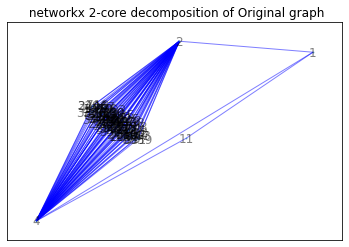

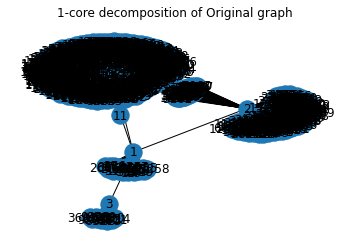

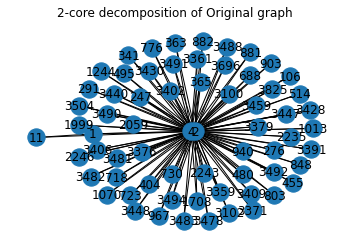

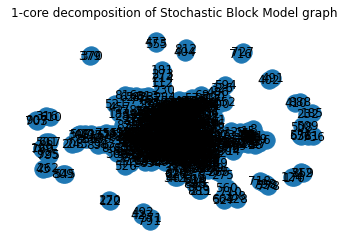

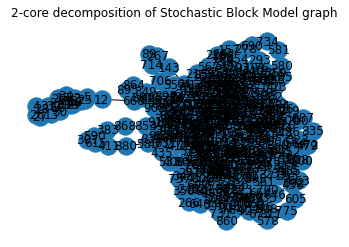

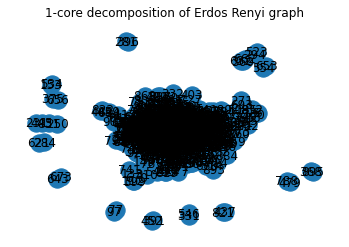

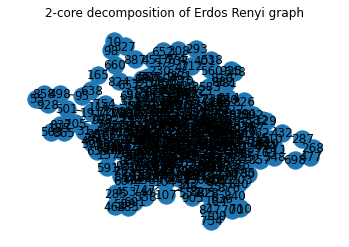

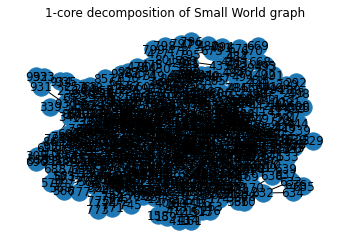

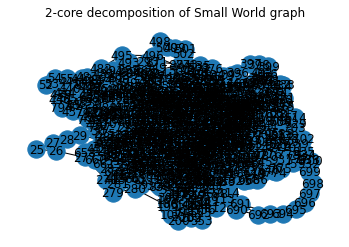

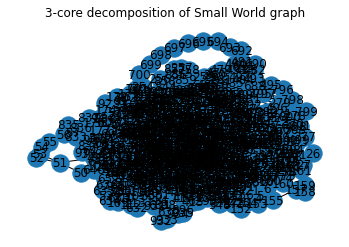

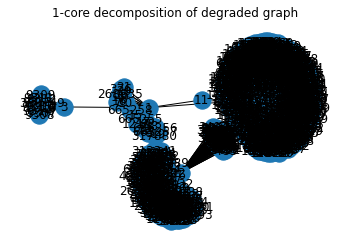

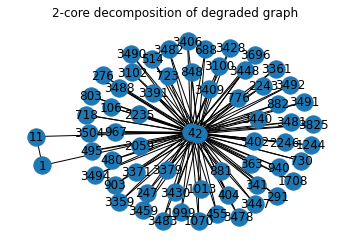

In [31]:
_G_CORE = nx.k_core(graphs, 2)
pos = nx.spring_layout(graphs)
plt.figure()
plt.title(' networkx 2-core decomposition of Original graph')
nx.draw_networkx(_G_CORE , pos = pos, node_size = 1, edge_color = "blue", alpha = 0.5, with_labels = True)
Original_Graph = full_k_core_decomposition(graphs, ' Original graph')
SBM_graph = full_k_core_decomposition(SBM, ' Stochastic Block Model graph')
Erdos_Renyi_graph = full_k_core_decomposition(Erdos_renyi, ' Erdos Renyi graph')
Smal_Word_graph = full_k_core_decomposition(Small_World, ' Small World graph')
Degraded_Graphs = full_k_core_decomposition(DG, ' degraded graph')

#Analysis & Considerations:

###The k-core decomposition on the original network generates graphs that seem to follow a preferential attachment behavior. There are nodes with very high degree and very few with low degree. This is compatible with the starting network, which is a natural. The decomposition of the Random and Small world graphs is not easily observable but surely for ER the subgraphs are random because the original distribution is normal and consequentially the sub graph distribution are normal and thus random. The same evaluation applies to SW. Degraded graphs also follow how it is possible to observe a power law.